In [9]:
import json
import pandas as pd
from fastai.text import *

data_lm = load_data("", "data_export.pkl", bs=50)
jdict = {}
with open("dataset.json", "r") as rf:
        while True:
            line = rf.readline()
            if not line:
                break
            raw = json.loads(line)
            jdict[raw["headline"]] = raw["is_sarcastic"]

df = pd.DataFrame(jdict.items(), columns=["headline", "sarcastic"])
df.to_csv("headline_text.csv", sep='\t', encoding="utf-8")

In [24]:
data_classifier = TextClasDataBunch.from_csv("", "headline_text.csv", vocab = data_lm.vocab, 
                                             text_cols="headline", label_cols="sarcastic", delimiter='\t', bs=50)

In [25]:
data_classifier.show_batch()

text,target
"xxbos ' 12 years a slave , ' ' captain phillips , ' ' american hustle , ' ' wolf of wall street , ' ' blue jasmine , ' ' dallas buyers club , ' ' her , ' ' nebraska , ' ' before midnight , ' and ' philomena ' all written during same continuing education screenwriting class",1
xxbos ' new york times ' moves all content you wo n't give a shit about unless you make at least $ xxunk a year into one convenient section,1
xxbos a labor day documentary : ' brothers on the line ' tells the story of the reuther brothers -- founding fathers of the american middle class,0
"xxbos ' i 'd like you to post long , aggressive rants on social media , ' says bernie sanders in supporter 's interpretation of speech",1
"xxbos trump : ' i know that was pretty bad , but let 's just say you 're going to want to save your energy '",1


In [27]:
learn = text_classifier_learner(data_classifier, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('learn1_enc')

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


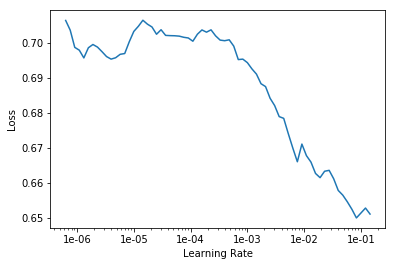

In [28]:
learn.lr_find()
learn.recorder.plot(skip_end=15)

In [29]:
learn.fit_one_cycle(1, 1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.527351,0.413200,0.819207,04:14
